In [18]:
import os
import pandas as pd
import librosa
import numpy as np

In [19]:
RAV = r"C:\Users\hp\Desktop\speech_emotion\Ravdess"
SAVEE = r"C:\Users\hp\Desktop\speech_emotion\Savee"
TESS = r"C:\Users\hp\Desktop\speech_emotion\TESS Toronto emotional speech set data"

In [20]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE + "\\"+i)
    
# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()
print(np.shape(SAVEE_df))

(480, 3)


In [21]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV +"\\"+ i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + "\\" + i + '\\' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()
print(np.shape(RAV_df))

(1440, 3)


In [22]:
EmotionData_temp = pd.concat( [SAVEE_df, RAV_df], axis = 0)

In [23]:
tess_directory_list=os.listdir(TESS)

file_emotion = []
file_path = []
print(TESS)
for dir in tess_directory_list:
    print(dir)
    directories = os.listdir(TESS +"\\"+ dir)
    for file in directories:
        #print(file)
        part = file.split('.')[0]
        part = part.split('_')[-1]
        if part=='ps':
            file_emotion.append('female_surprise')
        elif(part=="surprised"):
            file_emotion.append('female_surprise')
        elif(part=="fear"):
            file_emotion.append('female_fear')
        elif(part=="sad"):
            file_emotion.append('female_sad')
        else:
            file_emotion.append("female_" + part)
        file_path.append(TESS +"\\"+ dir + '\\' + file)
            
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['labels'])
# dataframe for path of files.
path_df = pd.DataFrame (file_path, columns=['path'])
Tess_df = pd.concat ([emotion_df, path_df], axis=1)
Tess_df['source'] = 'TESS'
Tess_df.head()

print(np.shape(Tess_df))

C:\Users\hp\Desktop\speech_emotion\TESS Toronto emotional speech set data
OAF_angry
OAF_disgust
OAF_Fear
OAF_happy
OAF_neutral
OAF_Pleasant_surprise
OAF_Sad
YAF_angry
YAF_disgust
YAF_fear
YAF_happy
YAF_neutral
YAF_pleasant_surprised
YAF_sad
(2800, 3)


In [24]:
EmotionData = pd.concat([EmotionData_temp, Tess_df], axis = 0)
print(EmotionData.labels.value_counts())

EmotionData.to_csv("Data_path.csv",index=False)

female_neutral     544
female_happy       496
female_sad         496
female_angry       496
female_fear        496
female_disgust     496
female_surprise    496
male_neutral       264
male_angry         156
male_disgust       156
male_fear          156
male_happy         156
male_sad           156
male_surprise      156
Name: labels, dtype: int64


In [25]:
ref=pd.read_csv("Data_path.csv")
print (np.shape(ref))

(4720, 3)


In [26]:
df = pd.DataFrame(columns=['feature'])

counter=0

for index,path in enumerate(ref.path):
    source=ref.source[index]
    if source=="RAVDESS":
        d=2.5
        O=0.5
    if source=="SAVEE":
        d=5.5
        o=0.5
    if source=="TESS":
        d=1.5
        o=0.0


    
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=d,sr=4410,offset=o)
    sample_rate = np.array(sample_rate)
    mfcc=librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
    mfcc_m=np.mean(mfcc,axis=1)  

    delta=librosa.feature.delta(mfcc)
    delta_m=np.mean(delta,axis=1)
    
    delta_delta=librosa.feature.delta(delta)
    delta_delta_m=np.mean(delta_delta,axis=1)
    
    feature = np.concatenate((mfcc_m, delta_m,delta_delta_m))

    df.loc[counter] = [feature]
    counter=counter+1   


print(len(df))
df.head()

4720


,feature
0,"[-137.28888, 111.72388, -21.969687, -20.997446..."
1,"[-109.47295, 67.51979, -40.233547, -5.063055, ..."
2,"[-132.01605, 88.65481, -32.769714, -9.400137, ..."
3,"[-103.55519, 83.91427, -34.984425, -17.377562,..."
4,"[-143.46548, 69.09458, -28.198627, -13.793649,..."


In [27]:
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

,labels,source,path,0,1,2,3,4,5,6,...,29,30,31,32,33,34,35,36,37,38
0,male_angry,SAVEE,C:\Users\hp\Desktop\speech_emotion\Savee\DC_a0...,-137.288879,111.723877,-21.969687,-20.997446,-48.871670,-2.439504,-34.307919,...,0.525392,0.662771,0.348220,0.523438,0.086971,0.450639,-0.046797,0.287537,0.018269,0.103508
1,male_angry,SAVEE,C:\Users\hp\Desktop\speech_emotion\Savee\DC_a0...,-109.472954,67.519791,-40.233547,-5.063055,-39.719791,7.764367,-25.280474,...,0.489980,0.170700,-0.234358,0.578445,-0.081931,0.415396,0.141780,0.291497,-0.048786,0.022573
2,male_angry,SAVEE,C:\Users\hp\Desktop\speech_emotion\Savee\DC_a0...,-132.016052,88.654808,-32.769714,-9.400137,-35.487514,4.695376,-29.375397,...,1.133303,1.217249,-0.244995,0.965961,0.180155,0.346001,0.007635,0.802352,-0.099798,0.037451
3,male_angry,SAVEE,C:\Users\hp\Desktop\speech_emotion\Savee\DC_a0...,-103.555191,83.914268,-34.984425,-17.377562,-56.287861,7.178759,-29.905863,...,0.715701,0.453319,0.138438,0.757691,0.041856,0.765676,0.114095,0.511521,-0.135596,0.007118
4,male_angry,SAVEE,C:\Users\hp\Desktop\speech_emotion\Savee\DC_a0...,-143.465485,69.094582,-28.198627,-13.793649,-44.961941,-1.339370,-27.697914,...,0.685708,0.871115,0.040399,0.495775,-0.230098,0.320866,-0.022060,0.349066,0.242089,0.206005


In [28]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1), df.labels, test_size=0.1, shuffle=True, random_state=2)

In [30]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [31]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [32]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(4248, 39, 1)

In [33]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
import tensorflow as tf

In [34]:
model = Sequential()
model.add(Conv1D(64, 8, padding='same',input_shape=(X_train.shape[1],1))) 
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14))
model.add(Activation('softmax'))
opt = tf.optimizers.Adam(learning_rate=0.0001)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 39, 64)            576       
                                                                 
 activation_9 (Activation)   (None, 39, 64)            0         
                                                                 
 conv1d_9 (Conv1D)           (None, 39, 64)            32832     
                                                                 
 activation_10 (Activation)  (None, 39, 64)            0         
                                                                 
 conv1d_10 (Conv1D)          (None, 39, 64)            32832     
                                                                 
 activation_11 (Activation)  (None, 39, 64)            0         
                                                                 
 batch_normalization_2 (Batc  (None, 39, 64)          

In [35]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=10, epochs=75, validation_data=(X_test, y_test))

Epoch 1/75
425/425 [==============================] - 15s 27ms/step - loss: 1.5879 - accuracy: 0.4748 - val_loss: 1.6683 - val_accuracy: 0.5742
Epoch 2/75
425/425 [==============================] - 11s 26ms/step - loss: 0.9213 - accuracy: 0.6864 - val_loss: 0.9347 - val_accuracy: 0.6864
Epoch 3/75
425/425 [==============================] - 12s 29ms/step - loss: 0.7833 - accuracy: 0.7236 - val_loss: 0.8568 - val_accuracy: 0.7246
Epoch 4/75
425/425 [==============================] - 12s 29ms/step - loss: 0.6887 - accuracy: 0.7476 - val_loss: 0.7598 - val_accuracy: 0.7309
Epoch 5/75
425/425 [==============================] - 12s 28ms/step - loss: 0.6248 - accuracy: 0.7728 - val_loss: 0.7174 - val_accuracy: 0.7627
Epoch 6/75
425/425 [==============================] - 12s 28ms/step - loss: 0.5786 - accuracy: 0.7893 - val_loss: 0.6960 - val_accuracy: 0.7479
Epoch 7/75
425/425 [==============================] - 13s 30ms/step - loss: 0.5489 - accuracy: 0.7959 - val_loss: 0.6759 - val_accuracy:

425/425 [==============================] - 13s 31ms/step - loss: 0.0633 - accuracy: 0.9772 - val_loss: 0.8770 - val_accuracy: 0.7881
Epoch 58/75
425/425 [==============================] - 13s 31ms/step - loss: 0.0621 - accuracy: 0.9788 - val_loss: 0.8369 - val_accuracy: 0.8157
Epoch 59/75
425/425 [==============================] - 12s 29ms/step - loss: 0.0637 - accuracy: 0.9769 - val_loss: 0.8093 - val_accuracy: 0.7966
Epoch 60/75
425/425 [==============================] - 12s 28ms/step - loss: 0.0603 - accuracy: 0.9805 - val_loss: 0.8638 - val_accuracy: 0.7860
Epoch 61/75
425/425 [==============================] - 12s 29ms/step - loss: 0.0527 - accuracy: 0.9809 - val_loss: 0.9143 - val_accuracy: 0.7945
Epoch 62/75
425/425 [==============================] - 12s 28ms/step - loss: 0.0522 - accuracy: 0.9821 - val_loss: 0.8778 - val_accuracy: 0.8136
Epoch 63/75
425/425 [==============================] - 13s 30ms/step - loss: 0.0650 - accuracy: 0.9762 - val_loss: 0.8559 - val_accuracy: 0.81

In [36]:
import matplotlib.pyplot as plt

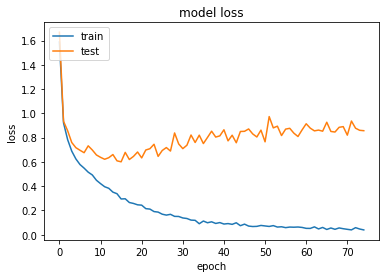

In [37]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

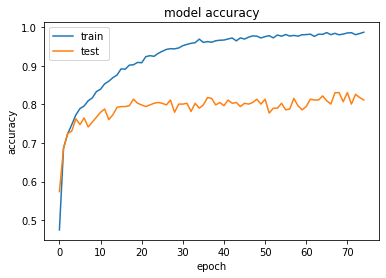

In [38]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [39]:
# Save model and weights
model_name = 'Emotion_Model1.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json1 = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at C:\Users\hp\Desktop\speech_emotion\saved_models\Emotion_Model1.h5 


NameError: name 'model_json' is not defined